# ロジスティック回帰
目的変数が二値をとる場合に用いられる回帰モデル

## シグモイド関数
変数 $x$ がある一定値以下のとき$y$が1である割合が0となり、$x$ がある一定値以上のとき$y$が1である割合が1となる関数

下記の式で表される
$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

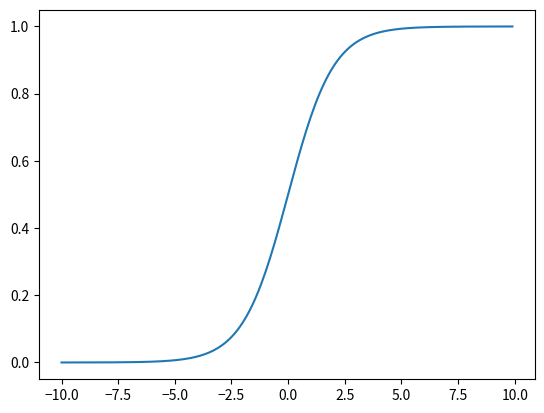

In [2]:
x = np.arange(-10, 10, 0.1)
y = 1 / (1 + math.e**-x)

plt.plot(x, y)
plt.show()

ある定数 $a$, $b$ を用いて、下記の関数を考えるとさまざまな曲線を表現することができる
$$
p(x) = \sigma(ax + b)
$$

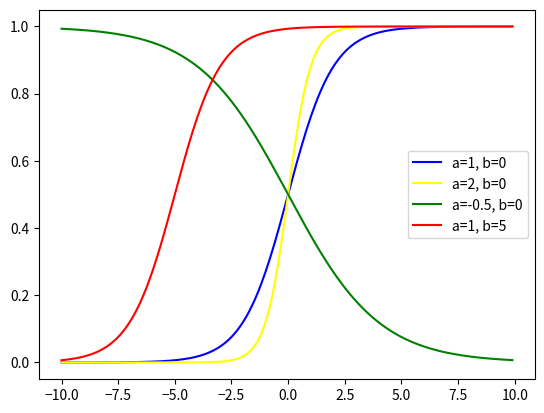

In [3]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, 1 / (1 + math.e**-(x)), color='blue', label='a=1, b=0')
plt.plot(x, 1 / (1 + math.e**-(2 * x)), color='yellow', label='a=2, b=0')
plt.plot(x, 1 / (1 + math.e**-(-0.5 * x)), color='green', label='a=-0.5, b=0')
plt.plot(x, 1 / (1 + math.e**-(x + 5)), color='red', label='a=1, b=5')
plt.legend()
plt.show()

ロジスティック回帰では $y$ は確率 $p(x)$ で1, $1-p(x)$で0となる確率変数であると設定する  
このようにすると、 $p(x) = \sigma(ax+b)$ が小さいところではほとんどの $y$ は0となり、大きいところではほとんどの $y$ は1となることを表現することできる  
この設定のもとで最もデータに当てはまる $a$, $b$ を見つける

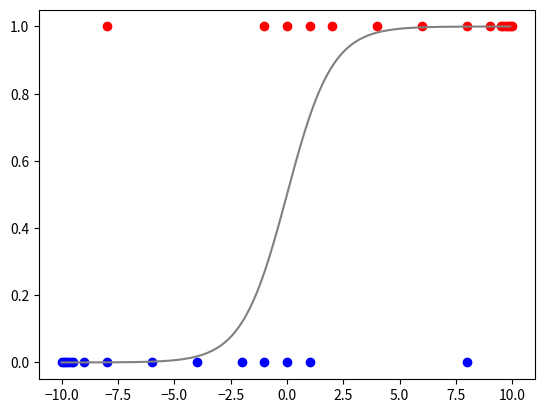

In [4]:
positive = np.array([-1, 0, 1, 2, 4, 6, 8, 9, 9.5, 9.6, 9.7, 9.8, 9.9, 10, -8])
negative = np.array([-1, 0, 1, -2, -4, -6, -8, -9, -9.5, -9.6, -9.7, -9.8, -9.9, -10, 8])
plt.scatter(positive, np.ones(len(positive)), color='red')
plt.scatter(negative, np.zeros(len(negative)), color='blue')

x = np.arange(-10, 10, 0.1)
plt.plot(x, 1 / (1 + math.e**-(x)), color='grey')

## 尤度
確率変数 $y$ に関する確率関数が、実際に抽出されたサンプルに対してどのくらい一致しているかの指標  
$y = p(x) = \sigma(ax + b)$ のもとで互いに独立な$N$個のサンプルの同時分布を考えると
$$
\begin{eqnarray}
p(y_1 | x_1)p(y_2 | x_2)\cdots{p(y_N | x_N)} &=& \prod_{i=1}^{N}{p(x_i)}^{y_i}(1-{p(x_i)})^{1-y_i} \\
&=& \prod_{i=1}^{N}{\sigma(ax_i+b)}^{y_i}(1-{\sigma(ax_i+b)})^{1-y_i}
\end{eqnarray}
$$
ここで $x_i$, $y_i$ は抽出されたサンプルの値（=定数）であるため、この値は $a$, $b$ を変数と見ることができる
$$
\mathcal{L}(a, b) = \prod_{i=1}^{N}{\sigma(ax_i+b)}^{y_i}(1-{\sigma(ax_i+b)})^{1-y_i}
$$
この$\mathcal{L}(a, b)$ を尤度と呼ぶ  

ロジスティック回帰ではこの尤度を最大にするパラメータ $a$, $b$ を最良のパラメータと考えこれを探す

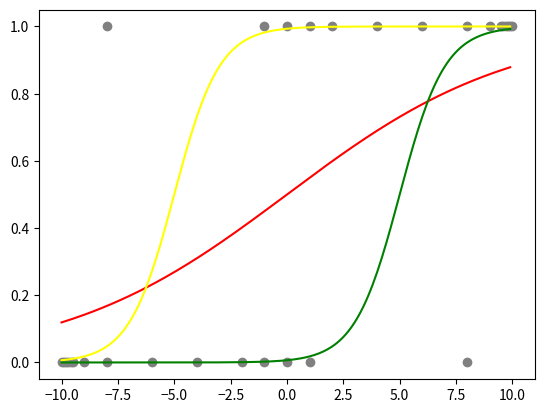

In [5]:
plt.scatter(positive, np.ones(len(positive)), color='grey')
plt.scatter(negative, np.zeros(len(negative)), color='grey')

x = np.arange(-10, 10, 0.1)
plt.plot(x, 1 / (1 + math.e**-(0.2 * x)), color='red')
plt.plot(x, 1 / (1 + math.e**-(x + 5)), color='yellow')
plt.plot(x, 1 / (1 + math.e**-(x - 5)), color='green')

## シグモイド関数の微分
$$
\frac{\partial}{\partial{x}}{\sigma(x)} = (1 - \sigma(x))\sigma(x)
$$

# 損失関数
二値の目的変数 $y$ に関する確率の予測値を $\hat{p}$ と表すと、$y = 1$ である $y$ の $\hat{p}$ は1に近づき、$y = 0$ となる $y$ の $\hat{p}$ は0に近づくのが理想である。

これを下記として式に表せる
$$
\mathcal{L} = -\sum_{i=i}^{N}{ y_{i}\log{\hat{p}_{i}} + (1-y_{i})\log{(1 - \hat{p}_{i})} }
$$

$y_{i}$ は $i$ 番目の $y$ の値を表し、0または1の値を取る  
$\hat{p}_{i}$ は $i$ 番目の $y$ が1となる確率の予測値を表し、0以上1以下の値を取る  

つまり、$y_{i} = 1$ の時は $-y_{i}\log{\hat{p}_{i}}$ の項のみが有効にであり、$\hat{p}_{i}$ が1に近ければ $i$ 番目の要素に関する誤差が0に近づく、逆に$\hat{p}_{i}$ が0に近い場合誤差が増大する

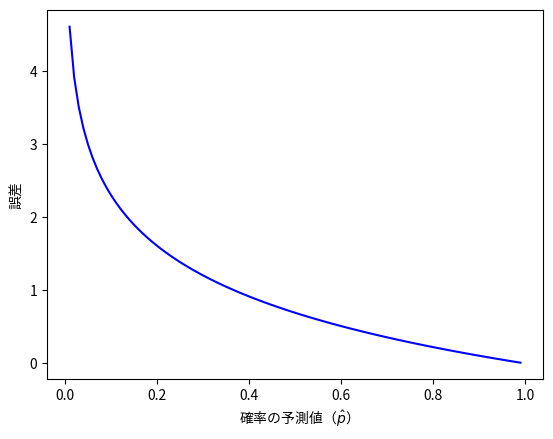

In [28]:
x = np.arange(0.01, 1, 0.01)
plt.xlabel(r"確率の予測値（$\hat{p}$）")
plt.ylabel('誤差')
plt.plot(x, [-1 * math.log(xi) for xi in x], color='blue')

逆に、$y_{i} = 0$ の時は $-(1- y_{i})\log{(1 - \hat{p}_{i})}$ の項のみが有効になり、$\hat{p}_{i}$ が1に近ければ $i$ 番目の要素に関する誤差は増大し、逆に$\hat{p}_{i}$ が0に近い場合誤差は0に近づく

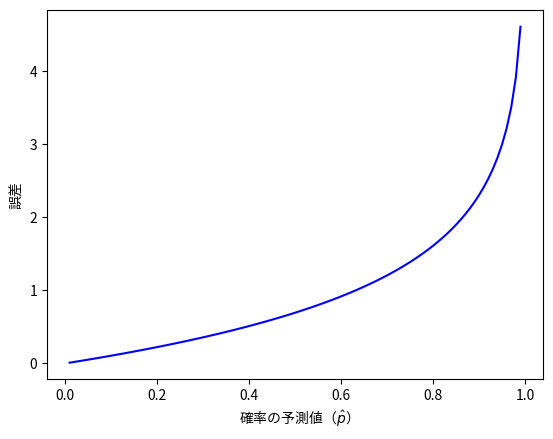

In [7]:
x = np.arange(0.01, 1, 0.01)
plt.xlabel(r"確率の予測値（$\hat{p}$）")
plt.ylabel('誤差')
plt.plot(x, [-1 * math.log(1 - xi) for xi in x], color='blue')

よって、この式を最小化するパラメータを考える
$$
\mathcal{L} = -\sum_{i=i}^{N}{ y_{i}\log{\hat{p}_{i}} + (1-y_{i})\log{(1 - \hat{p}_{i})} }
$$

# 損失関数を最小化するパラメータを見つける
多変数のロジスティック回帰の式を変数$\boldsymbol{x}$とパラメータ$\boldsymbol{w}$を用いて表すと下記の式で表すことができる。
$$
\hat{p} = p(\boldsymbol{x}) = \sigma{(\boldsymbol{w^T} \boldsymbol{x})}
$$

この時 $\boldsymbol{w^T} \boldsymbol{x}$ をロジットと呼び $ \log{\frac{\hat{p}}{1 - \hat{p}}}$で表せる

$$
\begin{eqnarray}
\mathcal{L} &=& -\sum_{i=i}^{N}{ y_{i}\log{\hat{p}_{i}} + (1-y_{i})\log{(1 - \hat{p}_{i})}} \\
&=& -\sum_{i=1}^{N}{ y_{i}\log{\hat{p}_{i}} + \log{(1 - \hat{p}_{i})} - y_{i}\log{(1 - \hat{p}_{i})}} \\
&=& -\sum_{i=1}^{N}{ y_{i}(\log{\hat{p}_{i}} - \log{(1 - \hat{p}_{i})}) + \log{(1 - \hat{p}_{i})}} \\
&=& -\sum_{i=1}^{N}{ y_{i}(\log{\frac{\hat{p}_{i}}{(1 - \hat{p}_{i})}}) +  \log{(1 - \hat{p}_{i})}} \\
&=& -\sum_{i=1}^{N}{ y_{i}(\boldsymbol{w^T} \boldsymbol{x}_i) +  \log{(1 - \frac{1}{ 1 + e^{(-\boldsymbol{w^T} \boldsymbol{x}_i)}})}} \\
&=& -\sum_{i=1}^{N}{ y_{i}(\boldsymbol{w^T} \boldsymbol{x}_i) +  \log{(\frac{1 + e^{(-\boldsymbol{w^T} \boldsymbol{x}_i)}}{1 + e^{(-\boldsymbol{w^T} \boldsymbol{x}_i)}} - \frac{1}{1 + e^{(-\boldsymbol{w^T} \boldsymbol{x}_i)}})}} \\
&=& -\sum_{i=1}^{N}{ y_{i}(\boldsymbol{w^T} \boldsymbol{x}_i) +  \log{(\frac{e^{(-\boldsymbol{w^T} \boldsymbol{x}_i)}}{1 + e^{(-\boldsymbol{w^T} \boldsymbol{x}_i)}})}} \\
&=& -\sum_{i=1}^{N}{ y_{i}(\boldsymbol{w^T} \boldsymbol{x}_i) } + \log{(e^{ (-\boldsymbol{w^T} \boldsymbol{x}_i) })} - \log{(1 + e^{ (-\boldsymbol{w^T} \boldsymbol{x}_i) })} \\
&=& -\sum_{i=1}^{N}{ y_{i}(\boldsymbol{w^T} \boldsymbol{x}_i) } + (-\boldsymbol{w^T} \boldsymbol{x}_i) - \log{(1 + e^{ (-\boldsymbol{w^T} \boldsymbol{x}_i) })} \\
&=& -\sum_{i=1}^{N}{ (y_{i} - 1) (\boldsymbol{w^T} \boldsymbol{x}_i) - \log{(1 + e^{ (-\boldsymbol{w^T} \boldsymbol{x}_i) })}}
\end{eqnarray}
$$

つまり
$$
\begin{eqnarray}
\mathcal{L} &=& -\sum_{i=1}^{N}{ (y_{i} - 1) (\boldsymbol{w^T} \boldsymbol{x}_i) - \log{(1 + e^{ (-\boldsymbol{w^T} \boldsymbol{x}_i) })}}
\end{eqnarray}
$$

$j$ 番目のパラメータ $w_j$ での偏微分を考える

$$
\begin{eqnarray}
\frac{\partial}{\partial{{w_j}}}\mathcal{L} &=& -\sum_{i=1}^{N}({ (y_i - 1)\boldsymbol{x}_{ij} - \frac{e^{(-\boldsymbol{w^T}\boldsymbol{x}_{i})}}{1 + e^{(-\boldsymbol{w^T}\boldsymbol{x}_{i})}}\boldsymbol{x}_{ij} }) \\
&=& -\sum_{i=1}^{N}({ (y_i - \frac{1}{1 + e^{(-\boldsymbol{w^T}\boldsymbol{x}_{i})}}){\boldsymbol{x}_{ij}} }) \\
&=& -\sum_{i=1}^{N}({ (y_i - \sigma({\boldsymbol{w^T}\boldsymbol{x}_{i}})){\boldsymbol{x}_{ij}} }) \\
&=& \sum_{i=1}^{N}({ (\sigma({\boldsymbol{w^T}\boldsymbol{x}_{i}}) + y_i){\boldsymbol{x}_{ij}} }) \\
&=& \boldsymbol{x}_{j}^T(\sigma(\boldsymbol{X}\boldsymbol{w}) - \boldsymbol{y})
\end{eqnarray}
$$

つまり損失関数の勾配は
$$
\begin{eqnarray}
\frac{\partial}{\partial{\boldsymbol{w}}}\mathcal{L} &=& \begin{bmatrix}
\boldsymbol{x}_{0}^T(\sigma(\boldsymbol{X}\boldsymbol{w}) - \boldsymbol{y}) \\
\boldsymbol{x}_{1}^T(\sigma(\boldsymbol{X}\boldsymbol{w}) - \boldsymbol{y}) \\
\vdots \\
\boldsymbol{x}_{M}^T(\sigma(\boldsymbol{X}\boldsymbol{w}) - \boldsymbol{y}) \\
\end{bmatrix} \\
&=& \begin{bmatrix}
\boldsymbol{x}_{0}^T \\
\boldsymbol{x}_{1}^T \\
\vdots \\
\boldsymbol{x}_{M}^T
\end{bmatrix} (\sigma(\boldsymbol{X}\boldsymbol{w}) - \boldsymbol{y}) \\
&=& \begin{bmatrix}
\boldsymbol{x}_{0} & \boldsymbol{x}_{1} & \cdots & \boldsymbol{x}_{M}
\end{bmatrix}^T (\sigma(\boldsymbol{X}\boldsymbol{w}) - \boldsymbol{y}) \\
&=& \boldsymbol{X}^T (\sigma(\boldsymbol{X}\boldsymbol{w}) - \boldsymbol{y})
\end{eqnarray}
$$

ここで合成関数の微分
$$
\begin{eqnarray}
f(g(x))' = f'(g(x))g'(x) \\
\end{eqnarray}
$$

$$
\begin{eqnarray}
f(x) &=& \log(x) \\
g(x) &=& 1 + e^{(-\boldsymbol{w^T}\boldsymbol{x})}
\end{eqnarray}
$$

$$
\begin{eqnarray}
f(g(x))' = \frac{1}{ 1 + e^{(-\boldsymbol{w^T}\boldsymbol{x})} } {e^{(-\boldsymbol{w^T}\boldsymbol{x})}\boldsymbol{x}}
\end{eqnarray}
$$

$$
\boldsymbol{X}^T (\sigma(\boldsymbol{X}\boldsymbol{w}) - \boldsymbol{y}) = \boldsymbol{0}
$$
を考える
学習率を $\eta$ とし 初期パラメータを $\boldsymbol{w}_0$、$k$回学習したパラメータを$\boldsymbol{w}_{k}$とすると$k+1$回目の学習されたパラメータは下記の通り導かれる
$$
\boldsymbol{w}_{k+1} = \boldsymbol{w}_{k} + \eta \boldsymbol{X}^T (\sigma(\boldsymbol{X}\boldsymbol{w_k}) - \boldsymbol{y})
$$

In [96]:
def target_func(x):
    return x ** 2
    
def inclination(x):
    return 2 * x

def bibun_function(x, target_x):
    a = inclination(target_x)
    return a * x - a * target_x + target_func(target_x)

def positions(target_x, range_min=-50, range_max=50):
    a = inclination(target_x)
    if(a == 0):
        return (range_min, range_max)
    
    y_zero_position_x = (a * target_x - target_func(target_x)) / a    
    
    if(y_zero_position_x < target_x):
        return (y_zero_position_x, range_max)
    elif(y_zero_position_x > target_x):
        return (range_min, y_zero_position_x)
    

<IPython.core.display.Javascript object>


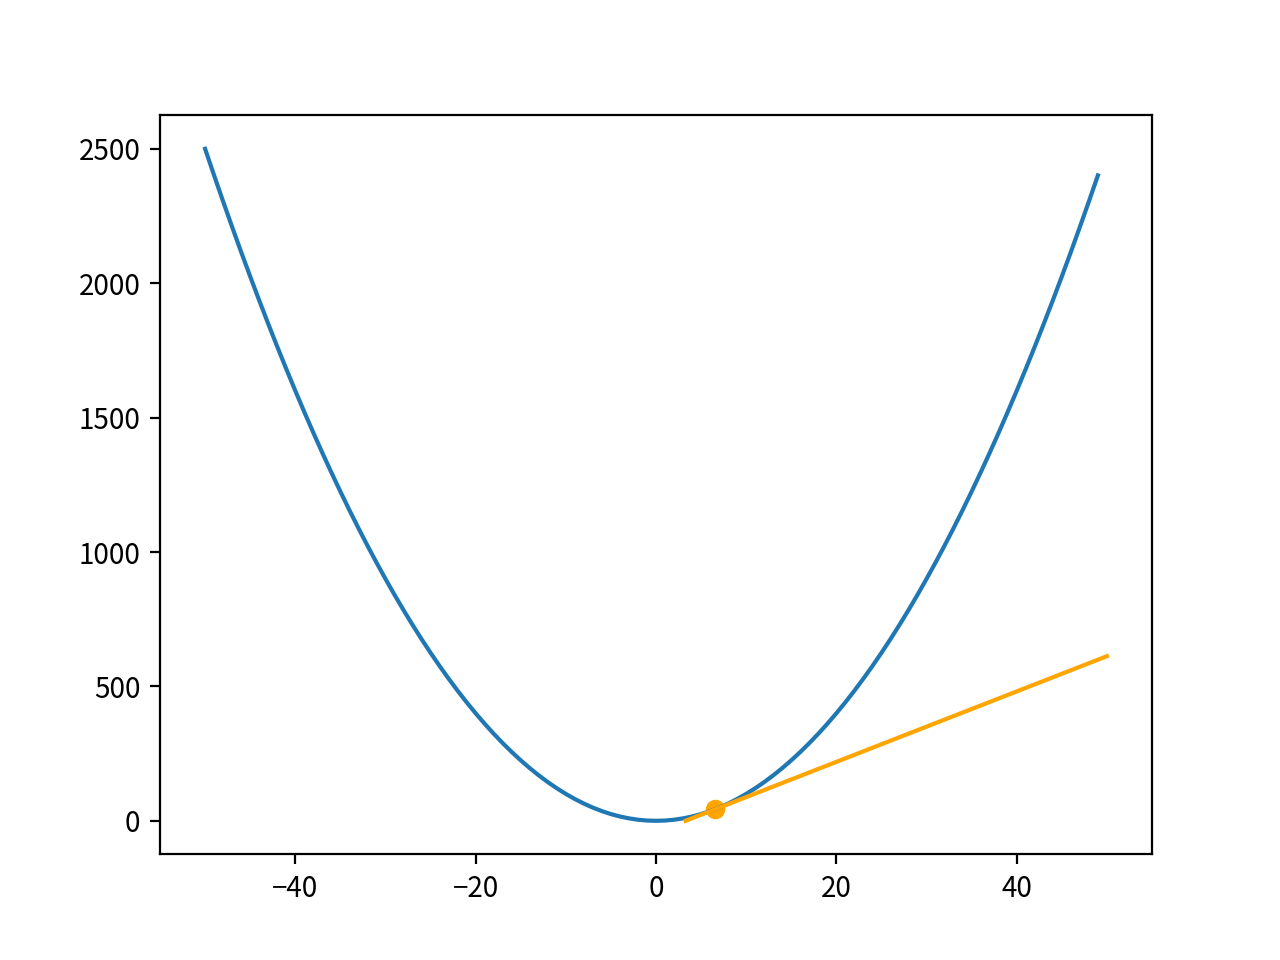

In [117]:
%matplotlib notebook
# %matplotlib nbagg
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

x = np.arange(-50, 50, 1)
ax.plot(x, [target_func(xs) for xs in x])

target_x = 20
left_x, right_x = positions(target_x, -50, 50)
frame_1 = ax.scatter(
    target_x, target_func(target_x), color='orange'
)
frame_2, = ax.plot(
    [left_x, right_x],
    [bibun_function(left_x, target_x), bibun_function(right_x, target_x)],
    color='orange'
)

frames = [[frame_1, frame_2]]

num_frames = 10
for i in range(num_frames):
    target_x = target_x - 0.1 * inclination(target_x)
    
    left_x, right_x = positions(target_x, -50, 50)
    
    frame_1 = ax.scatter(
        target_x, target_func(target_x), color='orange'
    )
    
    frame_2, = ax.plot(
        [left_x, right_x],
        [bibun_function(left_x, target_x), bibun_function(right_x, target_x)],
        color='orange'
    )
    frames.append([frame_1, frame_2])

# 描画b
ani = ArtistAnimation(fig, frames, interval=1000)
ani.save("test.gif", writer = 'imagemagick')

plt.show()

In [8]:
import pandas as pd

In [9]:
def sigmoid(A):
    return 1 / (1 + np.exp(-A))

In [10]:
def fit(X, y):
    Xb = np.c_[np.ones((len(X), 1)), X]
    m, n = Xb.shape
    w = np.random.rand(n, 1)

    for _ in range(100000):
        grad = np.matmul(Xb.T, sigmoid(Xb.dot(w)) - y.reshape(-1, 1))
        w -= 0.01 * grad
        
    return w

In [11]:
def predict(X):
    X_c = ((X - X_.mean()) / X_.std()).values
    Xb = np.c_[np.ones((len(X_c), 1)), X_c]
    
    return sigmoid(Xb.dot(w)) >= 0.5

In [12]:
df = pd.read_csv('statcast/savant_data.csv')

In [13]:
df

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,SL,2022-10-05,84.7,-2.67,5.61,"Ohtani, Shohei",660650,660271,strikeout,swinging_strike,...,0,0,1,1,0,Standard,Standard,58.0,-0.033,-0.204
1,SL,2022-10-05,83.9,-2.53,5.58,"Ohtani, Shohei",660650,660271,NaN,swinging_strike,...,0,0,1,1,0,Standard,Standard,64.0,0.000,-0.062
2,SL,2022-10-05,84.4,-2.55,5.65,"Ohtani, Shohei",660650,660271,NaN,swinging_strike,...,0,0,1,1,0,Standard,Standard,63.0,0.000,-0.046
3,CU,2022-10-05,74.3,-1.84,6.20,"Ohtani, Shohei",668843,660271,sac_fly,hit_into_play,...,0,0,1,1,0,Infield shift,Standard,38.0,0.019,-0.398
4,SL,2022-10-05,85.6,-2.49,5.58,"Ohtani, Shohei",640461,660271,double,hit_into_play,...,0,0,0,0,0,Standard,Standard,65.0,0.112,0.933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624,FS,2022-04-07,91.8,-1.76,6.04,"Ohtani, Shohei",514888,660271,strikeout,called_strike,...,0,0,0,0,0,Standard,Standard,234.0,0.022,-0.195
2625,SL,2022-04-07,86.9,-2.29,5.77,"Ohtani, Shohei",514888,660271,NaN,called_strike,...,0,0,0,0,0,Standard,Standard,92.0,0.000,-0.066
2626,FF,2022-04-07,99.2,-2.13,5.87,"Ohtani, Shohei",514888,660271,NaN,ball,...,0,0,0,0,0,Standard,Standard,207.0,0.000,0.049
2627,FF,2022-04-07,97.9,-2.16,5.89,"Ohtani, Shohei",514888,660271,NaN,called_strike,...,0,0,0,0,0,Standard,Standard,206.0,0.000,-0.043


In [14]:
# 球速、球種、回転数、リリース位置、結果
df[['release_speed', 'spin_axis', 'pitch_type', 'plate_x', 'plate_z', 'description']]

,release_speed,spin_axis,pitch_type,plate_x,plate_z,description
0,84.7,58.0,SL,0.16,2.99,swinging_strike
1,83.9,64.0,SL,0.62,2.90,swinging_strike
2,84.4,63.0,SL,0.79,1.43,swinging_strike
3,74.3,38.0,CU,-0.34,2.20,hit_into_play
4,85.6,65.0,SL,-0.72,2.75,hit_into_play
...,...,...,...,...,...,...
2624,91.8,234.0,FS,-0.89,2.05,called_strike
2625,86.9,92.0,SL,-0.64,1.74,called_strike
2626,99.2,207.0,FF,1.53,1.84,ball
2627,97.9,206.0,FF,-0.62,2.01,called_strike


In [15]:
# 大谷翔平がヒットを打たれる確率をロジスティック回帰で求める
# カテゴリ変数を数値に置き換える
## pitch_type
pitch_types = {}
for i, pitch_type in enumerate(np.unique(df['pitch_type'].values)):
    pitch_types[pitch_type] = i
df['pitch_type_seq'] = df['pitch_type'].apply(lambda x: pitch_types[x])

## descriptionは今回目的変数になるので、ヒット（hit_into_play）が1それ以外は0とする
df['description_seq'] = df['description'].apply(lambda x: 1 if x == 'hit_into_play' else 0)


y = df['description_seq'].values
X_ = df[['release_speed', 'pitch_type_seq', 'plate_x', 'plate_z']]
X = ((X_ - X_.mean()) / X_.std()).values

w = fit(X, y)
w

array([[-3.87859181],
       [-0.04797477],
       [ 1.20956269],
       [ 0.58914517],
       [-0.23156398]])

In [16]:
y_hat = predict(df[['release_speed', 'pitch_type_seq', 'plate_x', 'plate_z']])
df['predict'] = y_hat

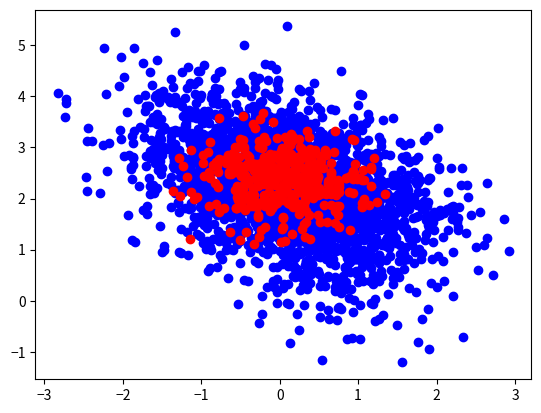

In [17]:
nega_positions = df.query('description_seq == True')[['plate_x', 'plate_z']]
posi_positions = df.query('description_seq != True')[['plate_x', 'plate_z']]

fig = plt.figure()
a1 = fig.add_subplot(1, 1, 1)
a1.scatter(posi_positions['plate_x'], posi_positions['plate_z'], color='blue')
a1.scatter(nega_positions['plate_x'], nega_positions['plate_z'], color='red')

plt.show()

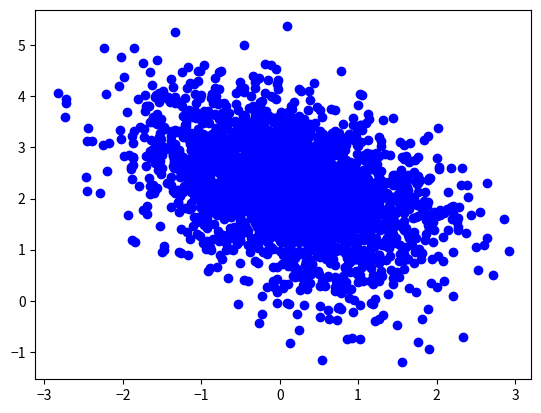

In [18]:
nega_positions = df.query('predict == True')[['plate_x', 'plate_z']]
posi_positions = df.query('predict != True')[['plate_x', 'plate_z']]

fig = plt.figure()
a1 = fig.add_subplot(1, 1, 1)
a1.scatter(posi_positions['plate_x'], posi_positions['plate_z'], color='blue')
a1.scatter(nega_positions['plate_x'], nega_positions['plate_z'], color='red')

plt.show()

In [19]:
X_c = ((df.query('description_seq == 1')[['release_speed', 'pitch_type_seq', 'plate_x', 'plate_z']] - X_.mean()) / X_.std()).values
nega_xs = np.c_[np.ones((len(X_c), 1)), X_c].dot(w)

In [20]:
X_c = ((df.query('description_seq == 0')[['release_speed', 'pitch_type_seq', 'plate_x', 'plate_z']] - X_.mean()) / X_.std()).values
posi_xs = np.c_[np.ones((len(X_c), 1)), X_c].dot(w)

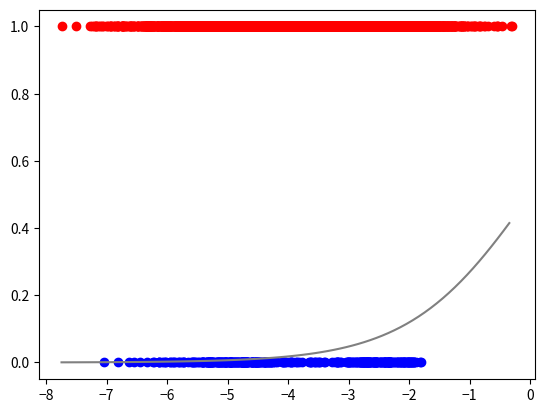

In [21]:
plt.scatter(posi_xs, np.ones(len(posi_xs)), color='red')
plt.scatter(nega_xs, np.zeros(len(nega_xs)), color='blue')

x = np.arange(np.min(posi_xs), np.max(posi_xs), 0.1)
plt.plot(x, 1 / (1 + math.e**-(x)), color='grey')

In [22]:
w

array([[-3.87859181],
       [-0.04797477],
       [ 1.20956269],
       [ 0.58914517],
       [-0.23156398]])

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
X_train = df[['release_speed', 'pitch_type_seq', 'plate_x', 'plate_z']]
Y_train = df[['description_seq']]

model = LogisticRegression()
model.fit(X_train.values, Y_train.values.reshape(-1))

LogisticRegression()

In [25]:
X_train.values

array([[84.7 ,  5.  ,  0.16,  2.99],
       [83.9 ,  5.  ,  0.62,  2.9 ],
       [84.4 ,  5.  ,  0.79,  1.43],
       ...,
       [99.2 ,  2.  ,  1.53,  1.84],
       [97.9 ,  2.  , -0.62,  2.01],
       [99.8 ,  2.  ,  1.32, -0.29]])

In [26]:
model.coef_

array([[ 0.02528419,  0.05193967, -0.05174716,  0.16994728]])

In [27]:
model.intercept_

array([-4.55135006])

ロジスティック回帰の回帰式を二次式にした場合を考える

$$
\boldsymbol{w} = \begin{bmatrix}
w_0 \\
w_1 \\
w_2 \\
\end{bmatrix}, 
\boldsymbol{x} = \begin{bmatrix}
x_0 \\
x_1 \\
x_2 \\
\end{bmatrix}
$$

一次式の場合は
$$
p(\boldsymbol{x}) = \sigma (w_0 * x_0 + w_1 * x_1 + w_2 * x_2)
$$

$$
\boldsymbol{w} = \begin{bmatrix}
w_0 \\
w_1 \\
w_2
\end{bmatrix}, 
\boldsymbol{x} = \begin{bmatrix}
x_0 \\
x_1 \\
x_2
\end{bmatrix}
$$
とすれば
$$
p(\boldsymbol{x}) = \sigma (\boldsymbol{w}^T\boldsymbol{x})
$$
と表せる

二次式の場合は
$$
\begin{eqnarray}
p(\boldsymbol{x}) &=& \sigma (w_{00} * {x_0}^2 + w_{01} * x_0 + w_{10} * {x_1}^2 + w_{11} * x_1 + x_{20} * {x_2}^2 + x_{21} * x_2) \\
&=& \sigma (w_0 * {x_0}^2 + w_1 * x_0 + w_2 * {x_1}^2 + w_3 * x_1 + x_4 * {x_2}^2 + x_5 * x_2)
\end{eqnarray}
$$

$$
\boldsymbol{w} = \begin{bmatrix}
w_0 \\
w_1 \\
w_2 \\
w_3 \\
w_4 \\
w_5
\end{bmatrix}, 
\boldsymbol{x} = \begin{bmatrix}
{x_0}^2 \\
x_0 \\
{x_1}^2 \\
x_1 \\
{x_2}^2 \\
x_2
\end{bmatrix}
$$
と置いてあげれば同様に
$$
p(\boldsymbol{x}) = \sigma (\boldsymbol{w}^T\boldsymbol{x})
$$
この式で計算できるのでは